# 聚类（Kmeans）与分类（SVM）
1.  学习聚类算法kmeans
2.  了解什么是线性分类器
3.  了解什么是支持向量，超平面
4.  什么情况下可以使用SVM
5.  线性分类器的核函数Kernel
6.  学习SVM在scikit-learn库中的使用
7.  学习plt作图


In [2]:
import numpy as np
from sklearn import svm  
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans

### 聚类分析（K-MEANS算法）
商场客户细分的聚类模型（Clustering Model）

目标：根据客户收入和支出分数，创建客户档案

指导方针：

1. 数据准备、清理和整理
2. 探索性数据分析
3. 开发聚类模型

数据描述 ：
1. CustomerID : 每个客户的唯一ID
2. Genre：用户的性别
3. Age：用户当前的年龄
4. Annual Income (k$) : 用户的年收入 (千美元)
5. Spending Score（1-100）：用户消费习惯（分数越高表示消费越多，反之亦然）

In [2]:
# To do:
# 读取Mall_Customers.csv数据
dataset = pd.read_csv('Mall_Customers.csv')

# To do:
# 查看数据信息和前五行数据，观察不同列的名字和字段
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
#To do:
#检查一下数据框中是否有任何重复的行
dataset.duplicated().sum()

0

从以上分析中，得出的结论是：

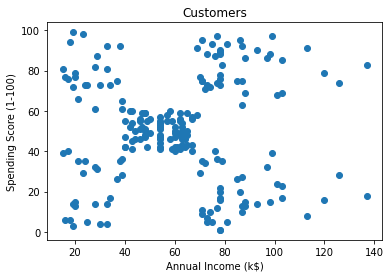

In [6]:
# To do:
#将数据年收入和消费习惯字段提出，赋给X
X = dataset.iloc[:, [3, 4]].values
# To do:
#画出年收入字段和消费习惯字段的散点图（一个字段作为x，一个字段作为y），并设置x轴和y轴的label、图例等信息。
plt.scatter(X[:,0], X[:,1])
plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

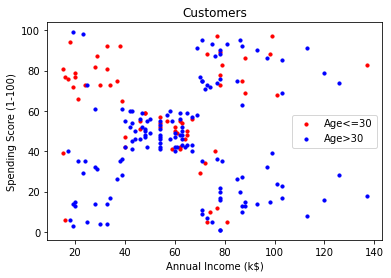

In [7]:
# To do:
# 筛选出年龄小于等于30岁的数据，赋给X_young；筛选出年龄大于30岁的数据，赋给X_handsome

X_young = X[dataset['Age'] <= 30]
X_handsome = X[dataset['Age'] > 30]

# To do:
# 将X_young和X_handsome 对应的年收入和消费习惯的散点图画在同一张图上，点用不同颜色表示，图例分别设置为'Age<=30'和'Age>30'
plt.scatter(X_young[:, 0], X_young[:, 1], s = 10, c = 'red', label = 'Age<=30')
plt.scatter(X_handsome[:, 0], X_handsome[:, 1], s = 10, c = 'blue', label = 'Age>30')
plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [9]:
# To do:
# 使用KMeans进行聚类，聚类数为5，随机种子为42
kmeans = KMeans(n_clusters=5, random_state=42)
# To do:
# 使用fit_predict函数对数据X进行聚类
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


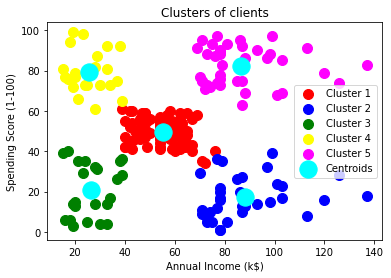

In [10]:
# 用散点图可视化聚类结果
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# 按样例画出另外四个聚类的散点图,color依次设定为blue、green、yellow、magenta
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#画出聚类中心的位置，聚类中心存储在kmeans.cluster_centers_，color设定为 cyan，label设定为Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'cyan', label = 'Centroids')
#添加标题、x轴y轴标签等信息
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

### 分类算法（SVM）样例一（小数据集）

In [3]:
# 自定义数据集，三维坐标数据
X = np.array([
    [-2, 4,-1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
# 标签即类别
y = np.array([-1,-1,1,1,1])

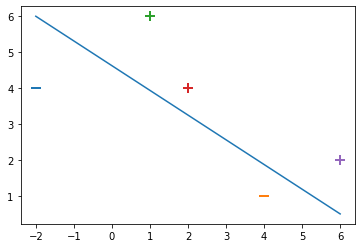

In [4]:
for d, sample in enumerate(X):
    # 画出负样本,marker使用'_'
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # To do:
    # 画出正样本,marker使用'+'
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# 画出分类超平面
plt.plot([-2,6],[6,0.5])

### 分类算法（SVM）样例二（大数据集）

In [10]:
# 正态分布来产生数字,20行2列*2  
np.random.seed(0)
x = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]] 
y = [0]*20+[1]*20 #20个class0，20个class1
print(x)
print(y) 

[[-3.04855297 -3.42001794]
 [-3.70627019 -0.0492246 ]
 [-2.50965218 -2.4380743 ]
 [-3.25279536 -1.22250964]
 [-3.61389785 -2.21274028]
 [-2.89546656 -1.6130975 ]
 [-2.51080514 -3.18063218]
 [-2.02818223 -1.57166813]
 [-1.93348278 -1.6975281 ]
 [-2.63432209 -2.36274117]
 [-2.67246045 -2.35955316]
 [-2.81314628 -3.7262826 ]
 [-1.82257386 -2.40178094]
 [-3.63019835 -1.53721774]
 [-2.90729836 -1.9480546 ]
 [-1.27090944 -1.87101709]
 [-0.86059932 -3.23482582]
 [-1.59765836 -2.68481009]
 [-2.87079715 -2.57884966]
 [-2.31155253 -1.94383466]
 [ 0.83485016  2.90082649]
 [ 2.46566244  0.46375631]
 [ 3.48825219  3.89588918]
 [ 3.17877957  1.82007516]
 [ 0.92924738  3.05445173]
 [ 1.59682305  3.22244507]
 [ 2.20827498  2.97663904]
 [ 2.3563664   2.70657317]
 [ 2.01050002  3.78587049]
 [ 2.12691209  2.40198936]
 [ 3.8831507   0.65224094]
 [ 0.729515    2.96939671]
 [ 0.82687659  3.94362119]
 [ 1.58638102  1.25254519]
 [ 3.92294203  3.48051479]
 [ 3.86755896  2.90604466]
 [ 1.13877431  3.91006495]
 

In [11]:
# 使用SVM进行分类，核函数为线性核函数
clf = svm.SVC(kernel='linear')  
# To do:
# 将x,y作为参数进行拟合
clf.fit(x,y) 

SVC(kernel='linear')

In [21]:
# To do:
# 使用clf.coef_[0]获取w
w = clf.coef_[0]
a = -w[0]/w[1] #斜率
print(a)

-0.9147537980492898


In [20]:
#画图划线  
# To do:
#xx的值选取linspace函数，范围：(-5,5)
xx = np.linspace(-5,5) #(-5,5)之间x的值
# xx带入y，得到yy
print(clf.intercept_)  
yy = a*xx-(clf.intercept_[0])/w[1] 

[0.05749992]


In [14]:
#画出与点相切的线
b = clf.support_vectors_[0]  
yy_down = a*xx+(b[1]-a*b[0])  
b = clf.support_vectors_[-1]  
yy_up = a*xx+(b[1]-a*b[0]) 

W: [0.31888067 0.34859727]
a: -0.9147537980492898
support_vectors_: [[-1.27090944 -1.87101709]
 [ 1.58638102  1.25254519]]
clf.coef_: [[0.31888067 0.34859727]]


<Figure size 576x288 with 0 Axes>

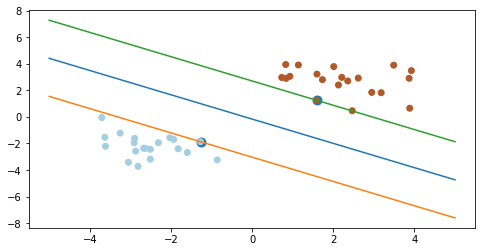

In [22]:
#画出支持向量  
plt.figure(figsize=(8,4))  
# To do:
# 使用plot函数画出xx,yy
print("W:",w)  
print("a:",a)  
  
print("support_vectors_:",clf.support_vectors_)  
print("clf.coef_:",clf.coef_)  
  
plt.figure(figsize=(8,4))  
plt.plot(xx,yy)  
# 使用plot函数画出xx,yy_down
plt.plot(xx,yy_down)  

# 使用plot函数画出xx,yy_up
plt.plot(xx,yy_up)  

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80)  
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired) #[:，0]列切片，第0列  
plt.axis('tight')  
plt.show()